In [1]:
import pandas as pd
import os, glob, re
import glob

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt   # 맷폴렛- 그래프
%matplotlib inline

# ignore warnings
import warnings    # 워닝 방지
warnings.filterwarnings('ignore')

####### matplotlib - 한글 폰트 깨짐 방지 코드 #######
import platform

if platform.system() == 'Darwin':    # 맥
    font_name = 'AppleGothic'
elif platform.system() == 'Linux':   # 리눅스
    font_name = 'NanumGothic'
elif platform.system() == 'Windows': # 윈도우
    font_name = 'Malgun Gothic'
else:
    print('알수없는 시스템. 미적용')

plt.rc('font', family=font_name)

In [3]:
os.getcwd()

'C:\\studyNote\\Project'

여기서부터 분석시작!

In [51]:
tes = pd.read_excel('면적.xlsx', encoding='euc-kr') 
tes.columns

Index(['시도시군구', '코드', '기준연도', '불투수면 비율(%)', '불투수면 면적(㎢)', '행정구역면적(㎢)',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'],
      dtype='object')

In [52]:
df_2015 = pd.read_csv('2015.csv', encoding='euc-kr') 
df_2015

,Unnamed: 0,gu,도시피해면적,시설용량,유출관크기면적,불투수면적,저지대율
0,1,해운대구,-0.407230,1.439911,0.638602,-0.828487,0.066854
1,2,중구,-0.407230,-0.486777,-0.419981,2.042589,1.353763
2,3,영도구,-0.407230,-1.134716,-0.880235,1.044806,0.688045
3,4,연제구,-0.407230,-0.457183,-0.419981,1.000871,0.698546
4,5,수영구,-0.407230,-1.703845,-1.340489,0.876497,1.011026
5,6,서구,-0.407230,-1.026311,-0.604083,0.822557,-0.854462
6,7,사하구,-0.407230,0.599770,0.776678,0.506864,0.765463
7,8,사상구,-0.407230,-0.663153,-1.708691,0.202257,0.117839
8,9,북구,-0.407230,-1.210600,-0.373956,0.196761,-0.852283
9,10,부산진구,-0.407230,-0.321676,-0.512032,-0.070484,-0.613462


In [53]:
df_2015.시설용량.corr(df_2015.유출관크기면적) #corr()로는 유의확률 구할 수 없어.

0.8446577141993867

In [54]:
df_2015.시설용량.corr(df_2015.유출관크기면적)

0.8446577141993867

In [55]:
# df_2015.불투수면비율.corr(df.침수심평균)

In [56]:
tes['행정구역면적(㎢)']

0       3.0130
1      12.1511
2      10.3490
3      16.6740
4      10.0945
5      27.2755
6      29.7783
7      14.6276
8      14.1426
9      36.2455
10     47.1056
11     52.3186
12    184.8830
13     39.7572
14     65.7313
15    219.8776
16    784.0244
Name: 행정구역면적(㎢), dtype: float64

In [57]:
tes['행정구역면적(㎢)'][:-1]

0       3.0130
1      12.1511
2      10.3490
3      16.6740
4      10.0945
5      27.2755
6      29.7783
7      14.6276
8      14.1426
9      36.2455
10     47.1056
11     52.3186
12    184.8830
13     39.7572
14     65.7313
15    219.8776
Name: 행정구역면적(㎢), dtype: float64

In [59]:
len(tes['행정구역면적(㎢)'][:-1])

16

In [60]:
df_2015['Unnamed: 0']=tes['행정구역면적(㎢)'][:-1]
df_2015 = df_2015.rename({'Unnamed: 0':'행정구역면적'}, axis='columns')

In [61]:
df_2015.columns

Index(['행정구역면적', 'gu', '도시피해면적', '시설용량', '유출관크기면적', '불투수면적', '저지대율'], dtype='object')

In [62]:
df_2015['행정구역면적']

0       3.0130
1      12.1511
2      10.3490
3      16.6740
4      10.0945
5      27.2755
6      29.7783
7      14.6276
8      14.1426
9      36.2455
10     47.1056
11     52.3186
12    184.8830
13     39.7572
14     65.7313
15    219.8776
Name: 행정구역면적, dtype: float64

In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [77]:
list(df_2015['행정구역면적'])

[3.0129999999999995,
 12.151099999999998,
 10.349000000000006,
 16.674,
 10.094499999999998,
 27.2755,
 29.77829999999999,
 14.627599999999994,
 14.142599999999998,
 36.24549999999999,
 47.1056,
 52.31859999999998,
 184.88299999999995,
 39.7572,
 65.73129999999999,
 219.87759999999994]

In [80]:
df_2015['행정구역면적'].values

array([  3.013 ,  12.1511,  10.349 ,  16.674 ,  10.0945,  27.2755,
        29.7783,  14.6276,  14.1426,  36.2455,  47.1056,  52.3186,
       184.883 ,  39.7572,  65.7313, 219.8776])

In [117]:
tmp = df_2015[['행정구역면적', '도시피해면적', '시설용량', '유출관크기면적', '불투수면적', '저지대율']]

In [118]:
tmp.values

array([[ 3.01300000e+00, -4.07229835e-01,  1.43991133e+00,
         6.38601865e-01, -8.28486773e-01,  6.68538417e-02],
       [ 1.21511000e+01, -4.07229835e-01, -4.86777396e-01,
        -4.19981406e-01,  2.04258860e+00,  1.35376301e+00],
       [ 1.03490000e+01, -4.07229835e-01, -1.13471632e+00,
        -8.80235003e-01,  1.04480573e+00,  6.88045430e-01],
       [ 1.66740000e+01, -4.07229835e-01, -4.57182729e-01,
        -4.19981406e-01,  1.00087055e+00,  6.98546045e-01],
       [ 1.00945000e+01, -4.07229835e-01, -1.70384454e+00,
        -1.34048860e+00,  8.76497018e-01,  1.01102605e+00],
       [ 2.72755000e+01, -4.07229835e-01, -1.02631095e+00,
        -6.04082845e-01,  8.22557481e-01, -8.54462212e-01],
       [ 2.97783000e+01, -4.07229835e-01,  5.99769673e-01,
         7.76677944e-01,  5.06864160e-01,  7.65462720e-01],
       [ 1.46276000e+01, -4.07229835e-01, -6.63152940e-01,
        -1.70869148e+00,  2.02256605e-01,  1.17839023e-01],
       [ 1.41426000e+01, -4.07229835e-01, -1.210

In [124]:
from sklearn.preprocessing import Normalizer
array = tmp.values
X = array[:,0:]
# print(X)
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

print(normalizedX)

[[ 0.85508226 -0.11557086  0.40864342  0.1812337  -0.23512258  0.01897296]
 [ 0.97842287 -0.03279069 -0.03919597 -0.03381747  0.16447197  0.10900681]
 [ 0.98274828 -0.03867083 -0.10775346 -0.08358773  0.09921548  0.06533728]
 [ 0.99634962 -0.02433389 -0.02731881 -0.02509586  0.0598067   0.0417414 ]
 [ 0.96885666 -0.03908538 -0.16353273 -0.12865831  0.08412502  0.09703693]
 [ 0.99799599 -0.01490032 -0.03755217 -0.02210307  0.03009694 -0.03126432]
 [ 0.99889013 -0.01366021  0.02011881  0.02605306  0.01700237  0.02567686]
 [ 0.99173768 -0.0276098  -0.04496115 -0.11584769  0.01371281  0.00798938]
 [ 0.99371925 -0.0286137  -0.08506191 -0.02627574  0.01382525 -0.05988505]
 [ 0.99965278 -0.01123142 -0.00887184 -0.01412187 -0.00194396 -0.01691932]
 [ 0.99928334 -0.00863885  0.00179986 -0.01281482 -0.00411813 -0.03426016]
 [ 0.99921615 -0.00777755  0.01722605  0.00780133 -0.01405798 -0.03084442]
 [ 0.99995291 -0.00220253  0.00163152  0.00494751 -0.00489277  0.00618505]
 [ 0.99834559 -0.01022597

In [63]:
df_2015

,행정구역면적,gu,도시피해면적,시설용량,유출관크기면적,불투수면적,저지대율
0,3.0130,해운대구,-0.407230,1.439911,0.638602,-0.828487,0.066854
1,12.1511,중구,-0.407230,-0.486777,-0.419981,2.042589,1.353763
2,10.3490,영도구,-0.407230,-1.134716,-0.880235,1.044806,0.688045
3,16.6740,연제구,-0.407230,-0.457183,-0.419981,1.000871,0.698546
4,10.0945,수영구,-0.407230,-1.703845,-1.340489,0.876497,1.011026
5,27.2755,서구,-0.407230,-1.026311,-0.604083,0.822557,-0.854462
6,29.7783,사하구,-0.407230,0.599770,0.776678,0.506864,0.765463
7,14.6276,사상구,-0.407230,-0.663153,-1.708691,0.202257,0.117839
8,14.1426,북구,-0.407230,-1.210600,-0.373956,0.196761,-0.852283
9,36.2455,부산진구,-0.407230,-0.321676,-0.512032,-0.070484,-0.613462


In [15]:
import seaborn as sns

In [122]:
cols = df_2015.columns[[0,2,3,4,5,6]]
sns.pairplot(df_2015[cols], kind = 'reg')

TypeError: 'data' must be pandas DataFrame object, not: <class 'numpy.ndarray'>

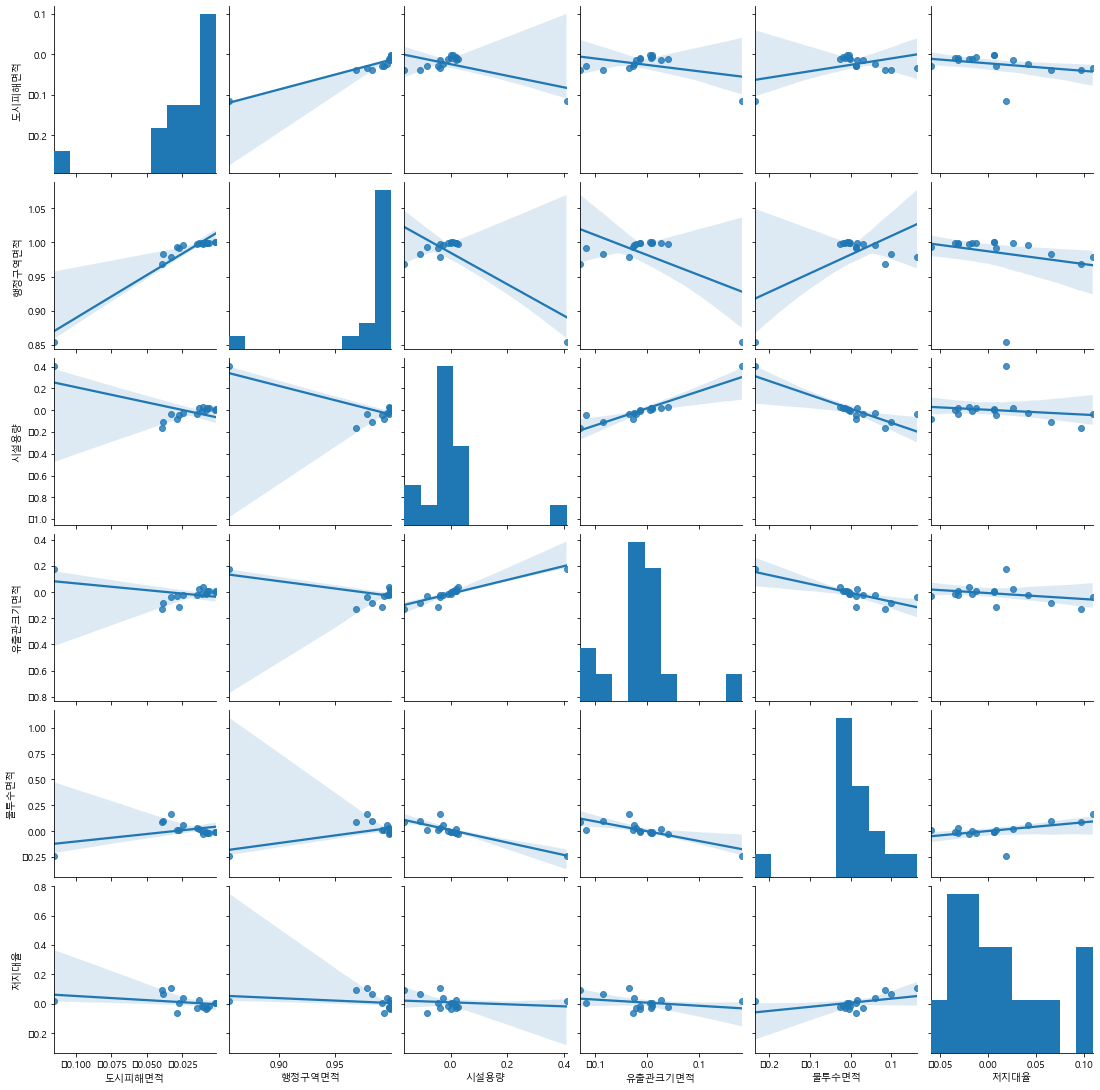

In [139]:
cols = ['도시피해면적','행정구역면적',  '시설용량', '유출관크기면적', '불투수면적', '저지대율']
sns.pairplot(data_a[cols], kind = 'reg')

In [126]:
data_a = pd.DataFrame(normalizedX,columns=['행정구역면적', '도시피해면적', '시설용량', '유출관크기면적', '불투수면적', '저지대율'])

In [127]:
data_a

,행정구역면적,도시피해면적,시설용량,유출관크기면적,불투수면적,저지대율
0,0.855082,-0.115571,0.408643,0.181234,-0.235123,0.018973
1,0.978423,-0.032791,-0.039196,-0.033817,0.164472,0.109007
2,0.982748,-0.038671,-0.107753,-0.083588,0.099215,0.065337
3,0.996350,-0.024334,-0.027319,-0.025096,0.059807,0.041741
4,0.968857,-0.039085,-0.163533,-0.128658,0.084125,0.097037
5,0.997996,-0.014900,-0.037552,-0.022103,0.030097,-0.031264
6,0.998890,-0.013660,0.020119,0.026053,0.017002,0.025677
7,0.991738,-0.027610,-0.044961,-0.115848,0.013713,0.007989
8,0.993719,-0.028614,-0.085062,-0.026276,0.013825,-0.059885
9,0.999653,-0.011231,-0.008872,-0.014122,-0.001944,-0.016919


      도시피해면적    행정구역면적      시설용량   유출관크기면적     불투수면적      저지대율
0  -0.115571  0.855082  0.408643  0.181234 -0.235123  0.018973
1  -0.032791  0.978423 -0.039196 -0.033817  0.164472  0.109007
2  -0.038671  0.982748 -0.107753 -0.083588  0.099215  0.065337
3  -0.024334  0.996350 -0.027319 -0.025096  0.059807  0.041741
4  -0.039085  0.968857 -0.163533 -0.128658  0.084125  0.097037
5  -0.014900  0.997996 -0.037552 -0.022103  0.030097 -0.031264
6  -0.013660  0.998890  0.020119  0.026053  0.017002  0.025677
7  -0.027610  0.991738 -0.044961 -0.115848  0.013713  0.007989
8  -0.028614  0.993719 -0.085062 -0.026276  0.013825 -0.059885
9  -0.011231  0.999653 -0.008872 -0.014122 -0.001944 -0.016919
10 -0.008639  0.999283  0.001800 -0.012815 -0.004118 -0.034260
11 -0.007778  0.999216  0.017226  0.007801 -0.014058 -0.030844
12 -0.002203  0.999953  0.001632  0.004948 -0.004893  0.006185
13 -0.010226  0.998346  0.025269  0.039151 -0.025520 -0.019466
14 -0.006193  0.999542  0.017981  0.009011 -0.017987 -0

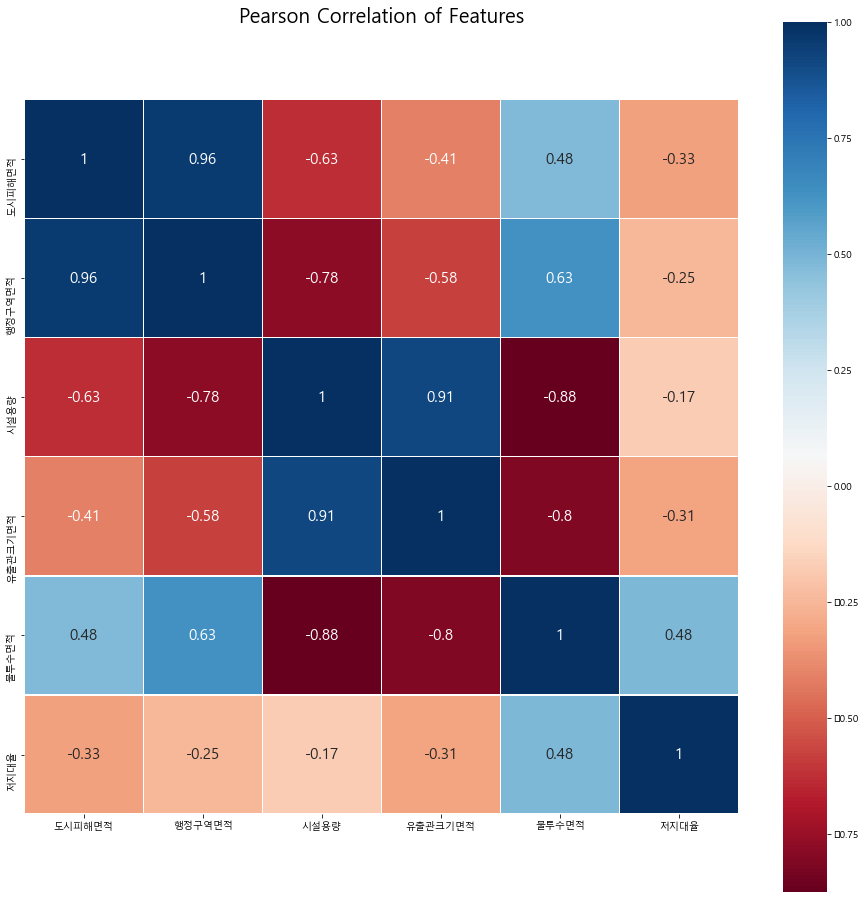

In [135]:
# 필요 특징만 꺼내서 진행 
heatmap_data = data_a[['도시피해면적','행정구역면적',  '시설용량', '유출관크기면적', '불투수면적', '저지대율']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(16, 16))
plt.title('Pearson Correlation of Features', y=1.1, size=20)

sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 15})

print(heatmap_data)

In [18]:
import scipy.stats as stats

In [19]:
cor1 = stats.pearsonr(df_2015.시설용량, df_2015.유출관크기면적) #피어슨 상관분석
cor1

(0.8446577141993865, 3.841713744748429e-05)

In [20]:
cor1_spear = stats.spearmanr(df_2015.시설용량, df_2015.유출관크기면적) #스피어만 상관계수 검정
cor1_spear

SpearmanrResult(correlation=0.7952880495319079, pvalue=0.00023060363042941252)

In [21]:
cor2 = stats.pearsonr(df_2015.시설용량, df_2015.불투수면적)
cor2

(-0.7791350723932424, 0.0003746576355439746)

In [22]:
cor2_spear = stats.spearmanr(df_2015.시설용량, df_2015.불투수면적)
cor2_spear

SpearmanrResult(correlation=-0.7941176470588236, pvalue=0.0002391909276256312)

In [23]:
cor3 = stats.pearsonr(df_2015.시설용량, df_2015.저지대율)
cor3

(-0.12562973673708977, 0.6429343995034401)

In [24]:
cor3_spear = stats.spearmanr(df_2015.시설용량, df_2015.저지대율)
cor3_spear

SpearmanrResult(correlation=-0.02207506116394726, pvalue=0.9353253445612628)

In [25]:
import statsmodels.formula.api as smf

In [136]:
model2 = smf.ols(formula = ' 도시피해면적 ~ 행정구역면적+시설용량+유출관크기면적+불투수면적+저지대율', data = df_2015)
result = model2.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 도시피해면적   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     2.540
Date:                Tue, 22 Sep 2020   Prob (F-statistic):             0.0983
Time:                        21:09:19   Log-Likelihood:                 52.627
No. Observations:                  16   AIC:                            -93.25
Df Residuals:                      10   BIC:                            -88.62
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4098      0.005    -80.400      0.0

In [27]:
model3 = smf.ols(formula = '도시피해면적 ~ 시설용량+유출관크기면적+저지대율', data = df_2015)
result2 = model3.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 도시피해면적   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     2.224
Date:                Tue, 22 Sep 2020   Prob (F-statistic):              0.138
Time:                        20:15:29   Log-Likelihood:                 49.606
No. Observations:                  16   AIC:                            -91.21
Df Residuals:                      12   BIC:                            -88.12
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4037      0.003   -128.345      0.0